- https://optimization.mccormick.northwestern.edu/index.php/Traveling_salesman_problems

# GLPK solver

Clustered TSP
The set of vertices V in G are parititioned into clusters V_1, V_2, ..., V_k.6 The objective is to identify the least cost tour such that cities within the same cluster must all be visited before moving to the next cluster.6 This can be reformualted by adding a large cost to each edge between clusters.6

Punnen, A. P. (2002). The traveling salesman problem: Applications, formulations and variations. In G. Gutin & A. P. Punnen (Eds.), The Traveling Salesman Problem and its Variations. Netherlands: Kluwer Academic Publishers.

In [102]:
import re

file = open('seventeen.txt')
cost_matrix = []
lines = file.readlines()
file.close()

for i in range(len(lines)):
    aux = lines[i][:-1].split(' ')
    aux = [int(i) for i in aux if i!= '']
#     aux = [re.sub("\s+", ", ", aux[0].strip())]
    cost_matrix.append(aux)

n = len(cost_matrix)

In [86]:
import pyomo.environ as pyEnv

In [103]:
#Model
model = pyEnv.ConcreteModel()

#Indexes for the cities
model.M = pyEnv.RangeSet(n)                
model.N = pyEnv.RangeSet(n)

#Index for the dummy variable u
model.U = pyEnv.RangeSet(2,n)

In [104]:
#Decision variables xij
model.x = pyEnv.Var(model.N,model.M, within=pyEnv.Binary)

#Dummy variable ui
model.u = pyEnv.Var(model.N, within=pyEnv.NonNegativeIntegers,bounds=(0,n-1))

In [105]:
#Cost Matrix cij
model.c = pyEnv.Param(model.N, model.M, initialize=lambda model, i, j: cost_matrix[i-1][j-1])

In [6]:
def obj_func(model):
    return sum(model.x[i,j] * model.c[i,j] for i in model.N for j in model.M)

model.objective = pyEnv.Objective(rule=obj_func, sense=pyEnv.minimize)

In [7]:
def rule_const1(model,M):
    return sum(model.x[i,M] for i in model.N if i!=M ) == 1

model.const1 = pyEnv.Constraint(model.M, rule=rule_const1)

In [8]:
def rule_const2(model,N):
    return sum(model.x[N,j] for j in model.M if j!=N) == 1

model.rest2 = pyEnv.Constraint(model.N, rule=rule_const2)

In [9]:
def rule_const3(model,i,j):
    if i!=j: 
        return model.u[i] - model.u[j] + model.x[i,j] * n <= n-1
    else:
        #Yeah, this else doesn't say anything
        return model.u[i] - model.u[i] == 0 
    
model.rest3 = pyEnv.Constraint(model.U, model.N, rule=rule_const3)

In [87]:
#Prints the entire model
model.pprint()
# pprint(filename=’file.txt’) if model is too big

3 Set Declarations
    c_index : Dim=0, Dimen=2, Size=289, Domain=None, Ordered=True, Bounds=None
        Virtual
    rest3_index : Dim=0, Dimen=2, Size=272, Domain=None, Ordered=True, Bounds=None
        Virtual
    x_index : Dim=0, Dimen=2, Size=289, Domain=None, Ordered=True, Bounds=None
        Virtual

3 RangeSet Declarations
    M : Dim=0, Dimen=1, Size=17, Domain=Integers, Ordered=True, Bounds=(1, 17)
        Virtual
    N : Dim=0, Dimen=1, Size=17, Domain=Integers, Ordered=True, Bounds=(1, 17)
        Virtual
    U : Dim=0, Dimen=1, Size=16, Domain=Integers, Ordered=True, Bounds=(2, 17)
        Virtual

1 Param Declarations
    c : Size=289, Index=c_index, Domain=Any, Default=None, Mutable=False
        Key      : Value
          (1, 1) :     0
          (1, 2) :   633
          (1, 3) :   257
          (1, 4) :    91
          (1, 5) :   412
          (1, 6) :   150
          (1, 7) :    80
          (1, 8) :   134
          (1, 9) :   259
         (1, 10) :   505
         (1,

        Key      : Lower : Body                        : Upper : Active
          (2, 1) :  -Inf :     u[2] - u[1] + 17*x[2,1] :  16.0 :   True
          (2, 2) :   0.0 :                 u[2] - u[2] :   0.0 :   True
          (2, 3) :  -Inf :     u[2] - u[3] + 17*x[2,3] :  16.0 :   True
          (2, 4) :  -Inf :     u[2] - u[4] + 17*x[2,4] :  16.0 :   True
          (2, 5) :  -Inf :     u[2] - u[5] + 17*x[2,5] :  16.0 :   True
          (2, 6) :  -Inf :     u[2] - u[6] + 17*x[2,6] :  16.0 :   True
          (2, 7) :  -Inf :     u[2] - u[7] + 17*x[2,7] :  16.0 :   True
          (2, 8) :  -Inf :     u[2] - u[8] + 17*x[2,8] :  16.0 :   True
          (2, 9) :  -Inf :     u[2] - u[9] + 17*x[2,9] :  16.0 :   True
         (2, 10) :  -Inf :   u[2] - u[10] + 17*x[2,10] :  16.0 :   True
         (2, 11) :  -Inf :   u[2] - u[11] + 17*x[2,11] :  16.0 :   True
         (2, 12) :  -Inf :   u[2] - u[12] + 17*x[2,12] :  16.0 :   True
         (2, 13) :  -Inf :   u[2] - u[13] + 17*x[2,13] :  16.0 :

In [92]:
!pyomo help --solvers


Pyomo Solvers and Solver Managers
---------------------------------
Pyomo uses 'solver managers' to execute 'solvers' that perform
optimization and other forms of model analysis.  A solver directly
executes an optimizer, typically using an executable found on the
user's PATH environment.  Solver managers support a flexible mechanism
for asyncronously executing solvers either locally or remotely.  The
following solver managers are available in Pyomo:

    neos       Asynchronously execute solvers on the NEOS server
    serial     Synchronously execute solvers locally

If no solver manager is specified, Pyomo uses the serial solver
manager to execute solvers locally.  The pyro and phpyro solver
managers require the installation and configuration of the pyro
software.  The neos solver manager is used to execute solvers on the
NEOS optimization server.


Serial Solver Interfaces
------------------------
The serial, pyro and phpyro solver managers support the following
solver interfaces:



In [20]:
#Solves
solver = pyEnv.SolverFactory('glpk')
result = solver.solve(model,tee = True)

#Prints the results
print(result)

GLPSOL: GLPK LP/MIP Solver, v4.65
Parameter(s) specified in the command line:
 --write /var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmpuc5_fkqe.glpk.raw
 --wglp /var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmpsavwa_29.glpk.glp
 --cpxlp /var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmp4fu9p7bf.pyomo.lp
Reading problem data from '/var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmp4fu9p7bf.pyomo.lp'...
/var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmp4fu9p7bf.pyomo.lp:2838: warning: lower bound of variable 'x2' redefined
/var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmp4fu9p7bf.pyomo.lp:2838: warning: upper bound of variable 'x2' redefined
307 rows, 290 columns, 1313 non-zeros
289 integer variables, 272 of which are binary
3110 lines were read
Writing problem data to '/var/folders/7x/h2csxt8d1tscwdvfwb_qvqj40000gn/T/tmpsavwa_29.glpk.glp'...
2494 lines were written
GLPK Integer Optimizer, v4.65
307 rows, 290 columns, 1313 non-zeros
289 integer variables, 272 of which are 

In [21]:
model.display()

Model unknown

  Variables:
    x : Size=289, Index=x_index
        Key      : Lower : Value : Upper : Fixed : Stale : Domain
          (1, 1) :     0 :  None :     1 : False :  True : Binary
          (1, 2) :     0 :   0.0 :     1 : False : False : Binary
          (1, 3) :     0 :   0.0 :     1 : False : False : Binary
          (1, 4) :     0 :   1.0 :     1 : False : False : Binary
          (1, 5) :     0 :   0.0 :     1 : False : False : Binary
          (1, 6) :     0 :   0.0 :     1 : False : False : Binary
          (1, 7) :     0 :   0.0 :     1 : False : False : Binary
          (1, 8) :     0 :   0.0 :     1 : False : False : Binary
          (1, 9) :     0 :   0.0 :     1 : False : False : Binary
         (1, 10) :     0 :   0.0 :     1 : False : False : Binary
         (1, 11) :     0 :   0.0 :     1 : False : False : Binary
         (1, 12) :     0 :   0.0 :     1 : False : False : Binary
         (1, 13) :     0 :   0.0 :     1 : False : False : Binary
         (1, 14)

In [52]:
List = list(model.x.keys())
movements = []
for i in List:
    if model.x[i]() != 0 and model.x[i]() != None:
        movements.append(i)
        print(i,'--', model.x[i]())

(1, 4) -- 1.0
(2, 5) -- 1.0
(3, 11) -- 1.0
(4, 13) -- 1.0
(5, 9) -- 1.0
(6, 17) -- 1.0
(7, 8) -- 1.0
(8, 6) -- 1.0
(9, 12) -- 1.0
(10, 2) -- 1.0
(11, 10) -- 1.0
(12, 16) -- 1.0
(13, 7) -- 1.0
(14, 15) -- 1.0
(15, 3) -- 1.0
(16, 1) -- 1.0
(17, 14) -- 1.0


In [61]:
r = range(len(cost_matrix))
dist = {(i+1, j+1): cost_matrix[i][j] for i in r for j in r}

In [62]:
TotalCost = 0
for i in range(len(movements)):
    TotalCost += dist[movements[i]]

In [63]:
print('Total cost of optimal route is', TotalCost)

Total cost of optimal route is 2085


- Optimal route

In [ ]:
1 -> 4 -> 13 -> 7 -> 8 -> 6 -> 17 -> 14 -> 15 -> 3 -> 11 -> 10 -> 2 -> 5 -> 9 -> 12 -> 16 -> 1

# Genetic

In [2]:
# !pip install mlrose

In [4]:
import mlrose
import numpy as np

In [68]:
dist_list = []
k = 0
for i in range(len(di)):
    for j in range(0, len(di)-1-k):
        if di[i][j+1]> 0:
            dist_list.append((i, j+1+k, di[i][j+1]))
    k += 1

In [74]:
len(di)

15

In [69]:
# Initialize fitness function object using dist_list
fitness_dists = mlrose.TravellingSales(distances = dist_list)

In [75]:
problem_fit = mlrose.TSPOpt(length = 15, fitness_fn = fitness_dists,
                            maximize=False)

In [76]:
# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, random_state = 2)

In [77]:
print('The best state found is: ', best_state)

The best state found is:  [11  6  7  4  0 10 14  5 12  2  8  9  1  3 13]


In [78]:
print('The fitness at the best state is: ', best_fitness)

The fitness at the best state is:  906.462562837098


- We can optimize we tuning the parameters

In [108]:
# Solve problem using the genetic algorithm
best_state, best_fitness = mlrose.genetic_alg(problem_fit, mutation_prob = 0.3, pop_size=300, 
                                              max_attempts = 100, random_state = 2)

In [109]:
print('The best state found is: ', best_state)

print('The fitness at the best state is: ', best_fitness)

The best state found is:  [ 2 12  5  9 14 10  3  7  4  1 11 13  0  8  6]
The fitness at the best state is:  899.0690410000736


# Manual GA

In [1]:
import numpy as np, random, operator, pandas as pd, matplotlib.pyplot as plt

In [2]:
class City:
    def __init__(self, x, y):
        self.x = x
        self.y = y
    
    def distance(self, city):
        xDis = abs(self.x - city.x)
        yDis = abs(self.y - city.y)
        distance = np.sqrt((xDis ** 2) + (yDis ** 2))
        return distance
    
    def __repr__(self):
        return "(" + str(self.x) + "," + str(self.y) + ")"

In [3]:
class Fitness:
    def __init__(self, route):
        self.route = route
        self.distance = 0
        self.fitness= 0.0
    
    def routeDistance(self):
        if self.distance ==0:
            pathDistance = 0
            for i in range(0, len(self.route)):
                fromCity = self.route[i]
                toCity = None
                if i + 1 < len(self.route):
                    toCity = self.route[i + 1]
                else:
                    toCity = self.route[0]
                pathDistance += fromCity.distance(toCity)
            self.distance = pathDistance
        return self.distance
    
    def routeFitness(self):
        if self.fitness == 0:
            self.fitness = 1 / float(self.routeDistance())
        return self.fitness

In [4]:
def createRoute(cityList):
    route = random.sample(cityList, len(cityList))
    return route

In [5]:
def initialPopulation(popSize, cityList):
    population = []

    for i in range(0, popSize):
        population.append(createRoute(cityList))
    return population

In [6]:
def rankRoutes(population):
    fitnessResults = {}
    for i in range(0,len(population)):
        fitnessResults[i] = Fitness(population[i]).routeFitness()
    return sorted(fitnessResults.items(), key = operator.itemgetter(1), reverse = True)


In [7]:
def selection(popRanked, eliteSize):
    selectionResults = []
    df = pd.DataFrame(np.array(popRanked), columns=["Index","Fitness"])
    df['cum_sum'] = df.Fitness.cumsum()
    df['cum_perc'] = 100*df.cum_sum/df.Fitness.sum()
    
    for i in range(0, eliteSize):
        selectionResults.append(popRanked[i][0])
    for i in range(0, len(popRanked) - eliteSize):
        pick = 100*random.random()
        for i in range(0, len(popRanked)):
            if pick <= df.iat[i,3]:
                selectionResults.append(popRanked[i][0])
                break
    return selectionResults

In [8]:
def matingPool(population, selectionResults):
    matingpool = []
    for i in range(0, len(selectionResults)):
        index = selectionResults[i]
        matingpool.append(population[index])
    return matingpool

In [9]:
def breed(parent1, parent2):
    child = []
    childP1 = []
    childP2 = []
    
    geneA = int(random.random() * len(parent1))
    geneB = int(random.random() * len(parent1))
    
    startGene = min(geneA, geneB)
    endGene = max(geneA, geneB)

    for i in range(startGene, endGene):
        childP1.append(parent1[i])
        
    childP2 = [item for item in parent2 if item not in childP1]

#     child = childP1 + childP2
    child = childP2[:startGene] + childP1 + childP2[startGene:]
    return child

In [10]:
def breedPopulation(matingpool, eliteSize):
    children = []
    length = len(matingpool) - eliteSize
    pool = random.sample(matingpool, len(matingpool))

    for i in range(0,eliteSize):
        children.append(matingpool[i])
    
    for i in range(0, length):
        child = breed(pool[i], pool[len(matingpool)-i-1])
        children.append(child)
    return children

In [11]:
def mutate(individual, mutationRate):
    for swapped in range(len(individual)):
        if(random.random() < mutationRate):
            swapWith = int(random.random() * len(individual))
            
            city1 = individual[swapped]
            city2 = individual[swapWith]
            
            individual[swapped] = city2
            individual[swapWith] = city1
    return individual

In [12]:
def mutatePopulation(population, mutationRate):
    mutatedPop = []
    
    for ind in range(0, len(population)):
        mutatedInd = mutate(population[ind], mutationRate)
        mutatedPop.append(mutatedInd)
    return mutatedPop

In [13]:
def nextGeneration(currentGen, eliteSize, mutationRate):
    popRanked = rankRoutes(currentGen)
    selectionResults = selection(popRanked, eliteSize)
    matingpool = matingPool(currentGen, selectionResults)
    children = breedPopulation(matingpool, eliteSize)
    nextGeneration = mutatePopulation(children, mutationRate)
    return nextGeneration

In [14]:
def geneticAlgorithm(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    print("Initial distance: " + str(1 / rankRoutes(pop)[0][1]))
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
    
    print("Final distance: " + str(1 / rankRoutes(pop)[0][1]))
    bestRouteIndex = rankRoutes(pop)[0][0]
    bestRoute = pop[bestRouteIndex]
    return bestRoute

In [15]:
cityList = []

for i in range(0,15):
    cityList.append(City(x=int(random.random() * 200), y=int(random.random() * 200)))

In [17]:
cityList

[(94,16),
 (6,27),
 (36,138),
 (148,84),
 (107,33),
 (140,95),
 (179,130),
 (91,127),
 (94,149),
 (153,109),
 (5,104),
 (10,16),
 (137,196),
 (196,55),
 (12,189)]

In [56]:
geneticAlgorithm(population=cityList, popSize=50, eliteSize=20, mutationRate=0.01, generations=50)


Initial distance: 1212.7690097482482
Final distance: 692.2181044317201


[(108,75),
 (84,165),
 (59,167),
 (134,176),
 (135,184),
 (171,168),
 (126,134),
 (113,118),
 (94,90),
 (58,68),
 (68,6),
 (90,1),
 (152,24),
 (188,9),
 (122,47)]

In [54]:
def distancee(x1,x2,y1,y2):
    
    xDis = abs(x1 - x2)
    yDis = abs(y1 - y2)
    distance = np.sqrt((xDis ** 2) + (yDis ** 2))
    return distance


In [92]:
di = []
for i in range(len(cityList)):
    di1 = []
    for j in range(len(cityList)):
        di1.append(distancee(cityList[i].x,cityList[j].x,cityList[i].y,cityList[j].y))
    di.append(di1)

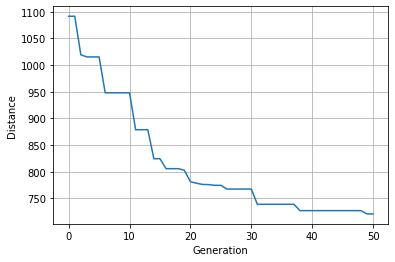

In [51]:
def geneticAlgorithmPlot(population, popSize, eliteSize, mutationRate, generations):
    pop = initialPopulation(popSize, population)
    progress = []
    progress.append(1 / rankRoutes(pop)[0][1])
    
    for i in range(0, generations):
        pop = nextGeneration(pop, eliteSize, mutationRate)
        progress.append(1 / rankRoutes(pop)[0][1])
    
    plt.plot(progress)
    plt.ylabel('Distance')
    plt.xlabel('Generation')
    plt.grid()
    plt.show()
    
geneticAlgorithmPlot(population=cityList, popSize=50, eliteSize=20, mutationRate=0.01, generations=50)
